# System Dynamics:

An analytically derived differential system is required to model the physics governing all aspects of the rocket's flight.

It's required for:
- A, B, C system matrices for the MPC algorithm,
- Reinforcement Learning Environment,
- Test bed simulations,


In [3]:
import numpy as np
from math import cos, sin

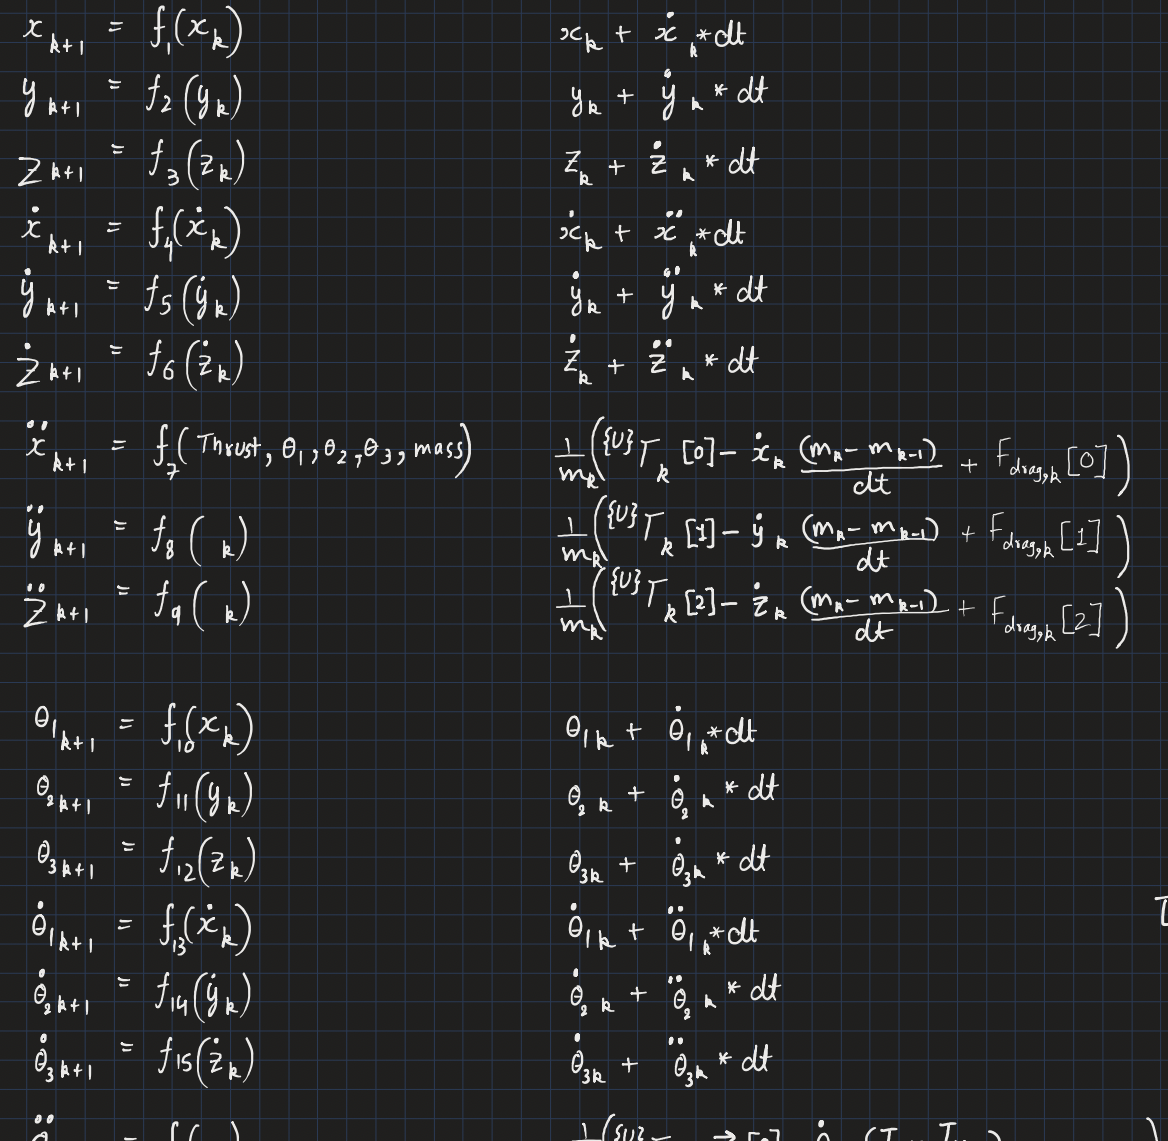

### Generalized Homogenous Transformation Matrix to convert vectors represented in rocket's frame back into the ground frame:
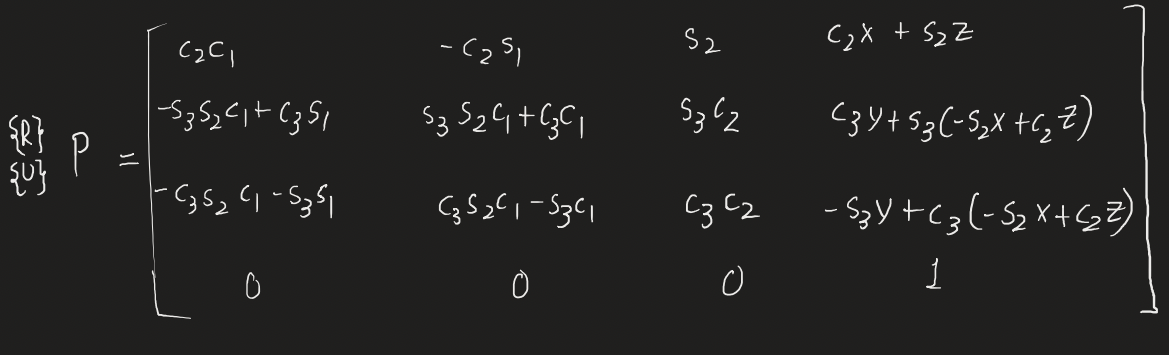

In [19]:
from sympy import symbols, Matrix, pprint

# Define symbols
x1, x2, x3, x7, x8, x9 = symbols('x1 x2 x3 x7 x8 x9')

# Create a symbolic matrix
matrix = Matrix([
    ["cos(x8)*cos(x7)", "-cos(x8)*sin(x7)", "sin(x7)", "cos(x8)*x1 + sin(x8)*x3"],
    ["(-sin(x9)*sin(x8)*cos(x7)) + (cos(x9)*sin(x7))", "(sin(x9)*sin(x8)*cos(x7)) + (cos(x9)*cos(x7))", "sin(x9)*cos(x8)", "cos(x9)*x2 + sin(x9)*(-sin(x8)*x1 + cos(x8)*x3)"],
    ["-cos(x9)*sin(x8)*cos(x7) - sin(x9)*sin(x7)", "cos(x9)*sin(x8)*cos(x7) - sin(x9)*cos(x7)", "cos(x9)*cos(x8)", "-sin(x9)*x2 + cos(x9)*(-sin(x8)*x1 + cos(x8)*x3)"],
    ["0", "0", "0", "x7"]
])

# Pretty print the matrix
print("Symbolic Matrix:")
pprint(matrix)

"""
This is just to print the matrix nicely for less painful visual verification of the individual terms.
Output:
"""

Symbolic Matrix:
⎡             cos(x₇)⋅cos(x₈)                            -sin(x₇)⋅cos(x₈)      ↪
⎢                                                                              ↪
⎢sin(x₇)⋅cos(x₉) - sin(x₈)⋅sin(x₉)⋅cos(x₇)   sin(x₈)⋅sin(x₉)⋅cos(x₇) + cos(x₇) ↪
⎢                                                                              ↪
⎢-sin(x₇)⋅sin(x₉) - sin(x₈)⋅cos(x₇)⋅cos(x₉)  sin(x₈)⋅cos(x₇)⋅cos(x₉) - sin(x₉) ↪
⎢                                                                              ↪
⎣                    0                                           0             ↪

↪               sin(x₇)                  x₁⋅cos(x₈) + x₃⋅sin(x₈)             ⎤
↪                                                                            ⎥
↪ ⋅cos(x₉)  sin(x₉)⋅cos(x₈)  x₂⋅cos(x₉) + (-x₁⋅sin(x₈) + x₃⋅cos(x₈))⋅sin(x₉) ⎥
↪                                                                            ⎥
↪ ⋅cos(x₇)  cos(x₈)⋅cos(x₉)  -x₂⋅sin(x₉) + (-x₁⋅sin(x₈) + x₃⋅cos(x₈))⋅cos(x₉)⎥
↪                   

'\nThis is just to print the matrix nicely for less painful visual verification of the individual terms.\nOutput:\n'

In [ ]:
⎡             cos(x₇)⋅cos(x₈)                              -sin(x₇)⋅cos(x₈)                      sin(x₇)                     x₁⋅cos(x₈) + x₃⋅sin(x₈)             ⎤
⎢                                                                                                                                                                ⎥
⎢sin(x₇)⋅cos(x₉) - sin(x₈)⋅sin(x₉)⋅cos(x₇)     sin(x₈)⋅sin(x₉)⋅cos(x₇) + cos(x₇)⋅cos(x₉)     sin(x₉)⋅cos(x₈)     x₂⋅cos(x₉) + (-x₁⋅sin(x₈) + x₃⋅cos(x₈))⋅sin(x₉) ⎥
⎢                                                                                                                                                                ⎥
⎢-sin(x₇)⋅sin(x₉) - sin(x₈)⋅cos(x₇)⋅cos(x₉)    sin(x₈)⋅cos(x₇)⋅cos(x₉) - sin(x₉)⋅cos(x₇)     cos(x₈)⋅cos(x₉)     -x₂⋅sin(x₉) + (-x₁⋅sin(x₈) + x₃⋅cos(x₈))⋅cos(x₉)⎥
⎢                                                                                                                                                                ⎥
⎣                    0                                             0                                0                                   x₇                       ⎦

## Code Assumptions:
- state_estimation(k)[n] gives the value of $n^{th}$ variable at the timestep $k$
- $C_\text{Drag}$ is simulated(using OpenFoam) accross a grid of {velocityocities, $\hat{n}_{Rocket}\cdot\hat{n}_{Velocity}$ , atomospheric densities} over sufficient ranges. Must be interpolated to match the time resolution of the algorithm. 
  - Should be stored like a 3D-array(LUT or Look-Up-Table).
- Thrust's simulated data is taken(and interpolated to the matching resolution if needed).
- Inertia has been simulated over time(and interpolated to the matching resolution if needed).
- Rocket's Total Mass has been simulated over time(and interpolated to the matching resolution if needed).
- $X_\text{Center of Pressure}$ is calculated numerically from the sideways orthogonal projection of the rocket.

& EVERYTHING NEEDS TO BE IN SI-UNITS(METRICS BABYY)!

In [4]:
# Placeholder Class:
class state_estimator:
    def __init__(self, n_sensors=5):
        pass
    def state_estimation(self, sensor_values_at_k = np.zeros(1000)):
        return {"x1":  0,
                "x2":  0,                
                "x3":  0,
                "x4":  0,
                "x5":  0,
                "x6":  0,
                "x7":  0,
                "x8":  0,
                "x9":  0,
                "x10": 0,
                "x11": 0,
                "x12": 0,
                "x13": 0,
                "x14": 0,
                "x15": 0,
                "x16": 0,
                "x17": 0,
                "x18": 0,
                }

In [5]:
import math

In [ ]:
class Rocket:
    def __init__(self, Thrust, Mass, Icm, I_axis, Length, Dia, X_CM, X_CP, Pressure_Profile, C_Drag, CS_area_1, CS_area_2, **args):
        """
        Note: This class simulates the atmospheric interactions, propulsion system, kinematics, and gravitation with a decent precision and accuracy over smaller time scales.
        Caution: Take the results with a grain of salt, the performance is yet to be quantized. A series of test flights might be required to tune some of the constants.

        Args: 
            - Total Time Steps(N): N is the number of total timesteps.
            - Time Resolution(dt): dt is the time resolution of the simulation(time difference between two consecutive time steps).
            (Total Simulation Time will then become N*dt)
            
            - Thrust Profile(Thrust): List of N Thrust simulated/tested values, one for each time step, simulated at dt seconds of separation
            - Mass Profile: List of N simulated/tested values, one for each time step, simulated at dt seconds of separation
            - Moment Of Intertia Profiles:
                - Icm: Moment Inertia about the com axis, oriented parallel to the ground
                - Icm: Moment of Inertia about the axis passing through nose and exhaust of the rocket
            
            - Length: Total Length of the rocket 
            - X_CM: Distance between the nose to center of mass
            - X_CP: Distance between the nose to center of pressure
            - Pressure Profile: Pressure Profile as a loopup table(python dictionary) mapping(altitude)->.
            - C_Drag: Assuming that Coefficient of Drag has been modeled beforehand as a function mapping(velocity, orientation, and pressure)->(C_Drag).
        
        """

        """State Variables:"""
        # Physical Parameters:
        self.Length = Length
        self.Dia = Dia
        self.X_CM = X_CM
        self.X_CP = X_CP
        self.CS_area_1 = CS_area_1
        self.CS_area_2 = CS_area_2

        # Time steps & resolution:
        self.N = 0
        self.dt = 0
        self.clock = 0  # If use update() -> increment the `clock` by 1 for internal time(step) keeping.
        self.validate_time_step()

        # Translational Position(x)
        self.x1 = np.zeros(self.N)
        self.x2 = np.zeros(self.N)
        self.x3 = np.zeros(self.N)
        # Translational Velocities(x dot)
        self.x4 = np.zeros(self.N)
        self.x5 = np.zeros(self.N)
        self.x6 = np.zeros(self.N)
        # Translational Accelerations(x double dot)
        self.x7 = np.zeros(self.N)
        self.x8 = np.zeros(self.N)
        self.x9 = np.zeros(self.N)

        # Euler Angles: {Pitch, Yaw, Roll}
        self.x10 = np.zeros(self.N)
        self.x11 = np.zeros(self.N)
        self.x12 = np.zeros(self.N)
        # Angular Velocities
        self.x13 = np.zeros(self.N)
        self.x14 = np.zeros(self.N)
        self.x15 = np.zeros(self.N)
        # Angular Accelerations
        self.x16 = np.zeros(self.N)
        self.x17 = np.zeros(self.N)
        self.x18 = np.zeros(self.N)

        # Input Variables(Thrust Angles)
        self.x19 = np.zeros(self.N)
        self.x20 = np.zeros(self.N)

        # Thrust, Mass and Inertia profiles:
        self.Thrust = Thrust
        self.Mass = Mass
        self.Icm = Icm          # about horizontal axis passing through com, list of N values
        self.I_axis = I_axis    # about the rocket's axis, list of N values
        
        # Gravity
        self.gravity = 9.81

        # Look Up Tables:
        self.C_Drag = C_Drag
        self.Pressure_Profile = Pressure_Profile


        """State Vector"""
        # X_vector initialized at 0th second:
        self.X_vec = self.X_vector()

        
        """Additional State Variables:"""
        # Orientation of the thrust in {R}
        self.n_thrust = np.zeros(3)
        self.velocity_vector = np.zeros(3)
        self.velocity_mag = 0
        # Unit vectors along of the rocket's velocity vector
        self.n_velocity = self.n_velocity()
        # Unit vectors along of the rocket's orientation
        self.n_rocket = self.n_rocket()
        # Matrix to transform vectors from Universal(ground) frame into the rocket's frame
        self.CS_area_vec = np.zeros(3)
        

    def R2U(self, r_coutner):
        """
        Returns: Homogenous transformation matrix to go from rocket's coordinate frame to the Universal.
        Remember: Only calculate it once at each timestep! It's an expensive calculation!
        """
        self.U2R = np.array([[cos(self.x11)*cos(self.x10),   -cos(self.x11)*sin(self.x10),
                                        sin(self.x10),    cos(self.x11)*self.x1 + sin(self.x11)*self.x3],
                            [(-sin(self.x12)*sin(self.x11)*cos(self.x10)) + (cos(self.x12)*sin(self.x10)),   (sin(self.x12)*sin(self.x11)*cos(self.x10)) + (cos(self.x12)*cos(self.x10)),
                                        sin(self.x12)*cos(self.x11), cos(self.x12)*self.x2 + sin(self.x12)*(-sin(self.x11)*self.x1 + cos(self.x11)*self.x3)],
                            [-cos(self.x12)*sin(self.x11)*cos(self.x10) - sin(self.x12)*sin(self.x10), cos(self.x12)*sin(self.x11)*cos(self.x10) - sin(self.x12)*cos(self.x10),
                                        cos(self.x12)*cos(self.x11), -sin(self.x12)*self.x2 + cos(self.x12)*(-sin(self.x11) * self.x1 + cos(self.x11) * self.x3)],
                            [0,0,0,1]]
                            )
        # Matrix to transform vectors from the rocket's frame back into the Universal(ground) frame:
        self.R2U = np.invert(self.R2U)

        return self.R2U

    
    def validate_time_step(self, step_number=10):
        # validating the class variable:
        if self.N <= 0:
            raise ValueError(f"Dumb shit detected: number of steps <= 0 \n = Invalid simulation duration -_-\"")
        # validating the k_th timestep:
        if not 0 <= step_number<=self.N:
            raise ValueError(f"The step number must be within the range. Valid Range = [0,{self.N}]")
        else:
            return True
        
    def X_vector(self, step_number = 0):
        f"""
        Args:
            - step_number: X vector will be created at this step,
             meaning for time t = {self.dt*step_number} seconds.
        """
        self.validate_time_step(step_number)
        return ([self.x1,self.x2,self.x3,self.x4,self.x5,self.x6,self.x7,self.x8,])
        
    def dynamics(self):
        """ Function that simulates all the physics equations:"""
        
        """ Functions for A-Matrix """
        # Translational Coordinates
        def f1(self, current):
            new = current + self.x4 * self.dt
            return new
        def f2(self, current):
            new = current + self.x5 * self.dt
            return new
        def f3(self, current):
            new = current + self.x6 * self.dt
            return new
        # Translational Velocities:
        def f4(self, current):
            new = current + self.x7 * self.dt
            return new
        def f5(self, current):
            new = current + self.x8 * self.dt
            return new
        def f6(self, current):
            new = current + self.x9 * self.dt
            return new
        # Translational Accelerations:
        def f7(self):   # a_x
            new = (1/self.Mass[self.clock]) * (thrust_vector_U[0] - state_estimator.state_estimation(self.clock)["x4"] * ((self.Mass[self.clock] - self.Mass[self.clock-1]) / self.dt) + drag_force[0])  # thrust_vector_U -> at the current timestep k
            return new
        def f8(self):   # a_y
            new = (1/self.Mass[self.clock]) * (self.gravity + thrust_vector_U[1] - state_estimator.state_estimation(self.clock)["x5"] * ((self.Mass[self.clock] - self.Mass[self.clock-1]) / self.dt) + drag_force[1])
            return new
        def f9(self):   # a_z
            new = (1/self.Mass[self.clock]) * (thrust_vector_U[2] - state_estimator.state_estimation(self.clock)["x6"] * ((self.Mass[self.clock] - self.Mass[self.clock-1]) / self.dt) + drag_force[2])
            return new
        

        # Euler Angles:
        def f10(self, current):
            new = current + self.x13 * self.dt
            return new
        def f11(self, current):
            new = current + self.x14 * self.dt
            return new
        def f12(self, current):
            new = current + self.x15 * self.dt
            return new
        # Angular Velocities:
        def f13(self, current):
            new = current + self.x6 * self.dt
            return new
        def f14(self, current):
            new = current + self.x17 * self.dt
            return new
        def f15(self, current):
            new = current + self.x18 * self.dt
            return new
        # Angular Accelerations:
        def f16(self):
            new = (1/self.Icm[self.clock]) * (thrust_torque()[0] + drag_torque[0] - state_estimator.state_estimation(self.clock)["x13"] * ((self.Icm[self.clock] - self.Icm[self.clock-1]) / self.dt))  # TODO: verify that: self.thrust_torque()[0] = torque about the first axis.
            return new
        def f17(self):
            new = (1/self.Icm[self.clock]) * (thrust_torque()[1] + drag_torque[1] - state_estimator.state_estimation(self.clock)["x14"] * ((self.Icm[self.clock] - self.Icm[self.clock-1]) / self.dt))
            return new
        def f18(self):
            new = (1/self.Icm[self.clock]) * (thrust_torque()[2] + drag_torque[2] - state_estimator.state_estimation(self.clock)["x15"] * ((self.Iaxis[self.clock] - self.Iaxis[self.clock-1]) / self.dt))
            return new
        
        """ Functions for B-Matrix """
        
        def g(self):
            alpha_1 = np.cross(self.r_vector, self.Thrust_vec) / ( self.Icm[self.clock] * self.n_thrust[0])
            alpha_2 = np.cross(self.r_vector, self.Thrust_vec) / ( self.Icm[self.clock] * self.n_thrust[1])
            alpha_3 = np.cross(self.r_vector, self.Thrust_vec) / ( self.I_axis[self.clock] * self.n_thrust[2])
            return [alpha_1,alpha_2,alpha_3]

        """Drag and Thrust Functions"""
        # Thrust & Drag Forces:
        def thrust_vector_U(self):
            self.Thrust_vec = self.Thrust[self.clock] * (self.R2U() @ self.n_thrust)
            return self.Thrust_vec
        def drag_force(self):
            vel = [i for i in update_n_velocity(self)]    # 0: velocity, 1: magnitude, 2: unit vector(direction)
            update_area_vector()
            # 1/2 * C_d * A:
            drag = 0.5 * self.C_Drag[vel[0]][vel[1]][vel[2]] * np.dot(self.CS_area_vec, vel[0])
            # (1/2 * C_d * A) * (- Velocity Vector):
            drag = drag * (-vel[0])
            return drag
        
        # Thrust & Drag Torques:
        def thrust_torque(self):
            r = (self.Length - self.X_CM) * self.n_rocket    # in the direction of rocket
            thrust_torque = np.cross(r, self.thrust_vector_U)
            return thrust_torque
        def drag_torque(self):
            r = np.mod(self.X_CP - self.X_)
            drag_torque = np.cross(r, self.drag_force())
            return drag_torque
        
        
        """Updating Area and Orientation Vectors"""
        def update_n_thrust(self):
            self.n_thrust = np.array([sin(self.x20),
                                    cos(self.x20) * cos(self.x20),
                                    cos(self.x20) * sin(self.x19)
                                ])

        def update_n_rocket(self):
            self.n_rocket = np.array([cos(self.x10) * cos(self.x11),
                                    sin(self.x10),
                                    cos(self.x10) * sin(self.x11),
                                    1])
            self.r_vector = (-self.n_rocket) * np.abs(self.Length - self.X_CM)
            return 1

        def update_n_velocity(self) -> list[np.array, float, np.array]:
            self.velocity = np.array([x1[self.clock]-x1[self.clock-1],
                                     x2[self.clock]-x2[self.clock-1],
                                     x3[self.clock]-x3[self.clock-1]])
            self.velocity_mag = np.linalg.norm(self.velocity_vec)
            self.n_velocity = (1/self.velocity_mag) * self.velocity
            return [self.velocity, self.velocity_mag, self.n_velocity]

        def update_area_vector(self):
            A1 = self.CS_area_1 * np.array()    # Along the rocket's x axis
            A2 = self.CS_area_1 * np.array()    # Along the rocket's y axis
            A3 = self.CS_area_2 * np.array()    # Along the rocket's z axis
            A_sum = A1 + A2 + A3
            self.CS_area_vec = np.dot(A_sum, self.n_velocity)
            return self.CS_area_vec


        """Finally:"""
        def A_matrix(self, time_step):
            return np.diag([f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14, f15, f16, f17, f18])

    
    def B_matrix(self):
        B_matrix = np.zeros((18,3))
        for i in range(6, 9):
            row = (self.Thrust[self.clock] / self.Mass) * (self.R2U()[i-6])
            B_matrix[i] = np.array(row)
        diagonal_elements = self.g()
        for i in range(15,18):
            for j in range(0, 3):
                diag = (i-15==j)
                if diag:
                    B_matrix[i][j] = diagonal_elements[j]

    def C_matrix(self):
        pass

    def update(self, X_current):
        self.clock += 1
        return np.matmul(self.A_matrix(), X_current)
    

## The Control Input Vector & the B Matrix:

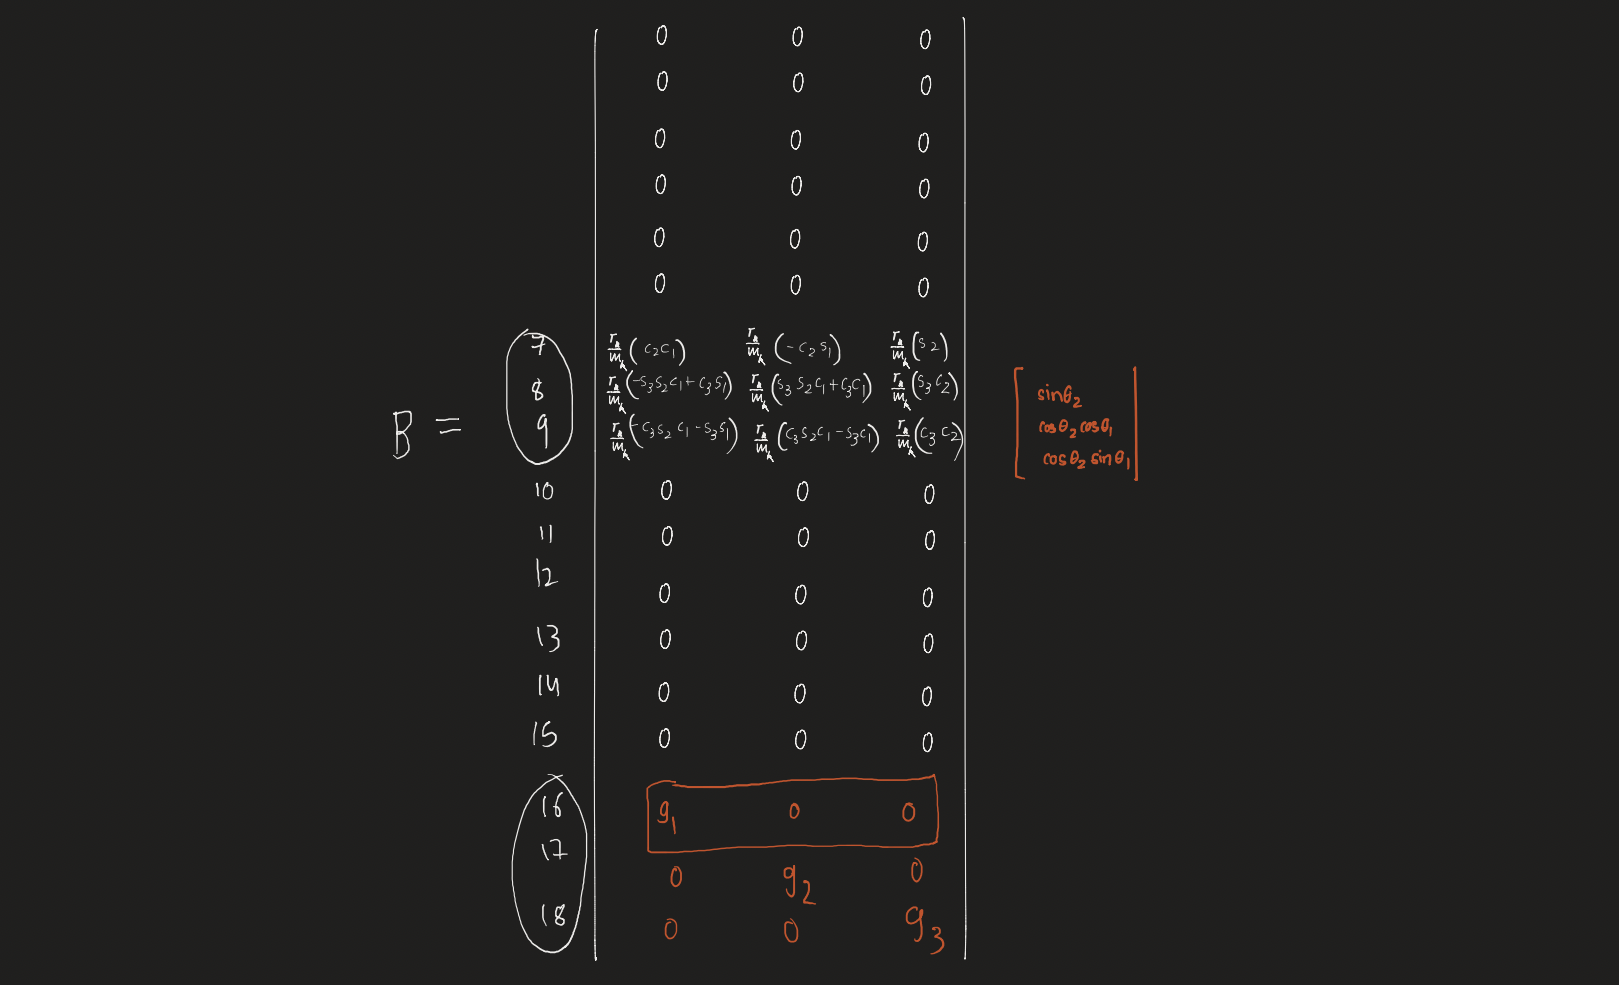

In [1]:
def g():
    alpha_1 = "np.cross(self.r_vector, self.Thrust_vec) / ( self.Icm[self.clock] * self.n_thrust[0])"
    alpha_2 = "np.cross(self.r_vector, self.Thrust_vec) / ( self.Icm[self.clock] * self.n_thrust[1])"
    alpha_3 = "np.cross(self.r_vector, self.Thrust_vec) / ( self.I_axis[self.clock] * self.n_thrust[2])"
    return [alpha_1,alpha_2,alpha_3]
def B_matrix():
    B_matrix = np.zeros((18,3), dtype=object)
    for i in range(6, 9):
        row = f"(self.Thrust[self.clock] / self.Mass) * (self.R2U()[{i-6}])"
        B_matrix[i] = np.array(row)
        for j in range(0,3):
            print(f"\t {B_matrix[i][j]} \t", end="")
        print()

    diagonal_elements = g()
    for i in range(15,18):
        for j in range(0, 3):
            diag = (i-15==j)
            if diag:
                B_matrix[i][j] = diagonal_elements[j]
                print(f"\t {B_matrix[i][j]} \t", end="")
            else:
                print("\t 0 \t", end="")
        print()
    return B_matrix

In [2]:
print(B_matrix())

NameError: name 'np' is not defined

In [ ]:
def g():
    alpha_1 = "np.cross(self.r_vector, self.Thrust_vec) / ( self.Icm[self.clock] * self.n_thrust[0])"
    alpha_2 = "np.cross(self.r_vector, self.Thrust_vec) / ( self.Icm[self.clock] * self.n_thrust[1])"
    alpha_3 = "np.cross(self.r_vector, self.Thrust_vec) / ( self.I_axis[self.clock] * self.n_thrust[2])"
    return [alpha_1,alpha_2,alpha_3]
def B_matrix():
    B_matrix = np.zeros((18,3), dtype=object)
    diagonal_elements = g()
    for i in range(0, 18):
        if i<9 and i >=6:
            row = f"(self.Thrust[self.clock] / self.Mass) * (self.R2U()[{i-6}])"
            B_matrix[i] = np.array(row)
            for j in range(0,3):
                print(f"\t {B_matrix[i][j]} \t", end="")
        elif i<18 and i >14:
            for j in range(0, 3):
                diag = (i-15==j)
                if diag:
                    B_matrix[i][j] = diagonal_elements[j]
                    print(f"\t {B_matrix[i][j]} \t", end="")
                else:
                    print("\t\t\t\t\t\t 0 \t\t\t\t\t\t", end="")
        else:
            print("\t\t\t\t\t\t 0 \t\t\t\t\t\t 0 \t\t\t\t\t\t 0 \t\t\t\t\t\t", end="")

        print()
    return B_matrix

In [54]:
print(B_matrix())

						 0 						 0 						 0 						
						 0 						 0 						 0 						
						 0 						 0 						 0 						
						 0 						 0 						 0 						
						 0 						 0 						 0 						
						 0 						 0 						 0 						
	 (self.Thrust[self.clock] / self.Mass) * (self.R2U()[0]) 		 (self.Thrust[self.clock] / self.Mass) * (self.R2U()[0]) 		 (self.Thrust[self.clock] / self.Mass) * (self.R2U()[0]) 	
	 (self.Thrust[self.clock] / self.Mass) * (self.R2U()[1]) 		 (self.Thrust[self.clock] / self.Mass) * (self.R2U()[1]) 		 (self.Thrust[self.clock] / self.Mass) * (self.R2U()[1]) 	
	 (self.Thrust[self.clock] / self.Mass) * (self.R2U()[2]) 		 (self.Thrust[self.clock] / self.Mass) * (self.R2U()[2]) 		 (self.Thrust[self.clock] / self.Mass) * (self.R2U()[2]) 	
						 0 						 0 						 0 						
						 0 						 0 						 0 						
						 0 						 0 						 0 						
						 0 						 0 						 0 						
						 0 						 0 						 0 						
						 0 						 0 						 0 						
	 np.cross(self.r_vector, self.Thrust_vec) / ( self.Icm[se

In [9]:
for i in range(15,18):
    for j in range(0, 3):
        diag = (i-15==j)
        if diag:
            print(f" {j} ", end="")
        else:
            print(" 0 ", end="")
    print()

 0  0  0 
 0  1  0 
 0  0  2 


In [1]:
import numpy as np